In [12]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd


### Lets first undertand our data

In [24]:
###opening an image, choose one of those available in the folder images
fits_file = fits.open('imagens/cutout_10509500101588.fits')
fits_file.info()

Filename: imagens/cutout_10509500101588.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  IMAGE_G       1 PrimaryHDU      83   (256, 256)   int16 (rescales to float32)   
  1  IMAGE_R       1 ImageHDU        82   (256, 256)   int16 (rescales to float32)   
  2  IMAGE_I       1 ImageHDU        82   (256, 256)   int16 (rescales to float32)   
  3  IMAGE_Z       1 ImageHDU        82   (256, 256)   int16 (rescales to float32)   
  4  PSF_G         1 ImageHDU        15   (25, 25)   int16 (rescales to float32)   
  5  PSF_R         1 ImageHDU        15   (25, 25)   int16 (rescales to float32)   
  6  PSF_I         1 ImageHDU        15   (25, 25)   int16 (rescales to float32)   
  7  PSF_Z         1 ImageHDU        15   (25, 25)   int16 (rescales to float32)   


- explore the different products  available in the fist file

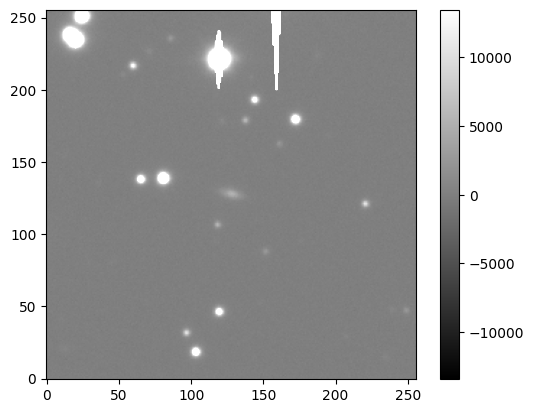

In [27]:
image_data = fits_file[3].data
m, s = np.median(image_data), np.std(image_data)

#plotting the image
plt.imshow(image_data, cmap='gray', origin='lower', vmin = m-s, vmax = m+s)
plt.colorbar()
plt.show()

#closing the file to avoid memory issues
#fits_file.close()

- explore the count values in your file

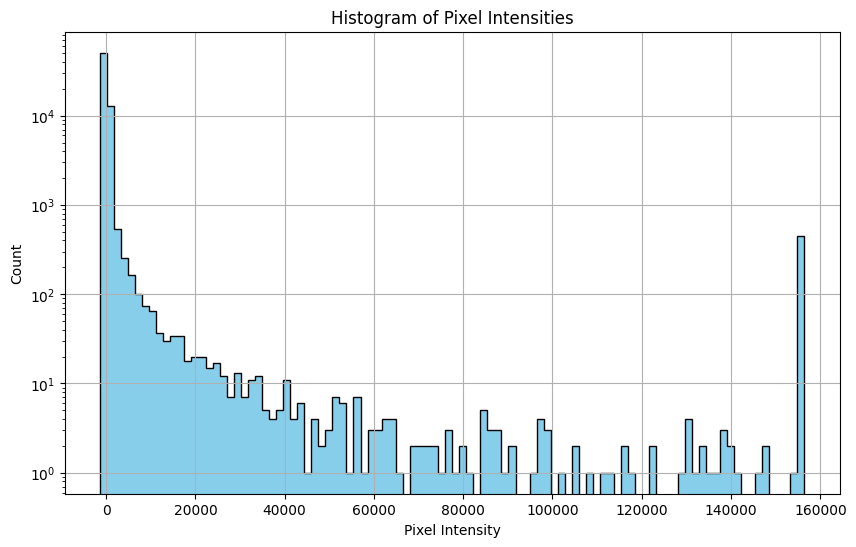

In [33]:
#flatten the image data to a 1D array for the histogram
flattened_data = image_data.flatten()

#remove NaN values (if so) to avoid issues in the histogram
cleaned_data = flattened_data[~np.isnan(flattened_data)]

plt.figure(figsize=(10, 6))
plt.hist(cleaned_data, bins=100, color='skyblue', histtype='stepfilled', edgecolor='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.title('Histogram of Pixel Intensities')
plt.yscale('log')  #log scale if the distribution is wide
plt.grid(True)
plt.show()

### Lets create a very simple rgb image composition using the single image we loaded


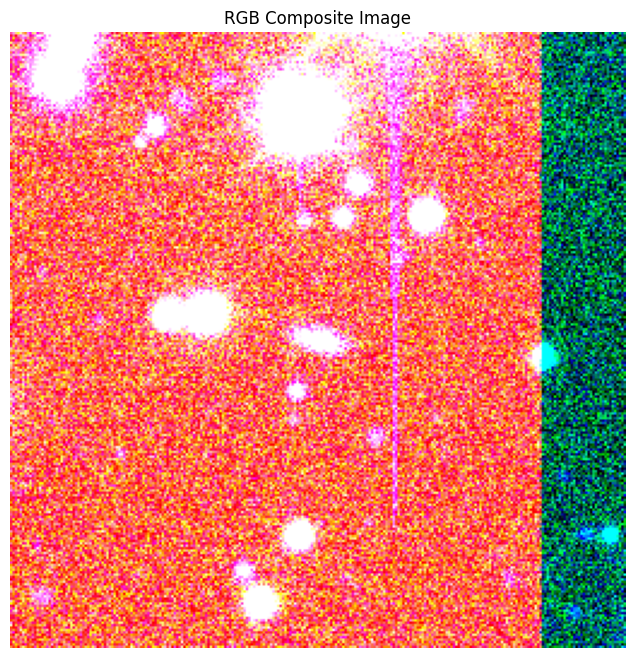

In [38]:
##here you separate each image band from the original fits file
image_g = fits_file[0].data.astype(float)
image_r = fits_file[1].data.astype(float)
image_i = fits_file[2].data.astype(float)

def normalize(image):
    min_val = np.percentile(image, 10)  #Remove extreme low values
    max_val = np.percentile(image, 90)  #Remove extreme high values
    norm_image = np.clip((image - min_val) / (max_val - min_val), 0, 1)
    return norm_image

norm_r = normalize(image_r)
norm_g = normalize(image_g)
norm_i = normalize(image_i)


#Stack the images into an RGB array
rgb_image = np.dstack((norm_r, norm_g, norm_i))

plt.figure(figsize=(8, 8))
plt.imshow(rgb_image, origin='lower')
plt.title('RGB Composite Image')
plt.axis('off')
plt.show()

- try to create the rgb image using the Luptom function available on astropy

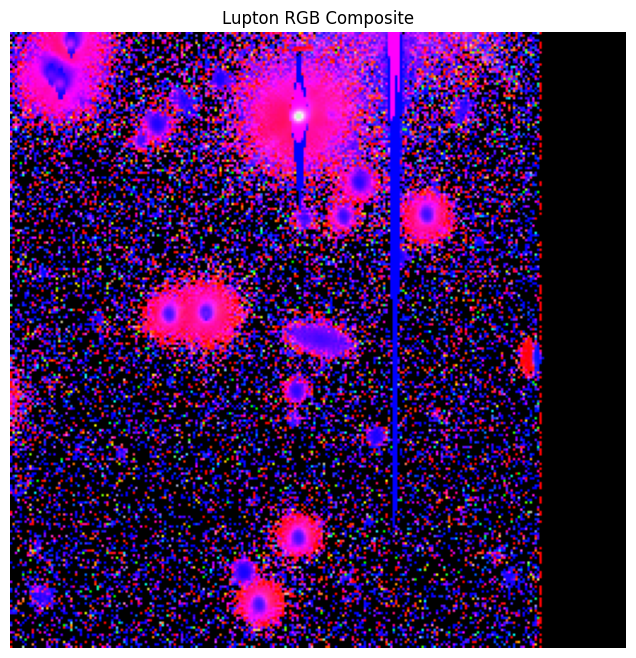

In [39]:
from astropy.visualization import make_lupton_rgb

image_r = fits_file[1].data.astype(float)  #R-band
image_g = fits_file[0].data.astype(float)  #G-band
image_i = fits_file[2].data.astype(float)  #I-band

#create the RGB image using Lupton's method
rgb_image = make_lupton_rgb(image_r, image_g, image_i, stretch=0.5, Q=10) ##play arounf these parameters it is really hard to find a optimum threshold


plt.figure(figsize=(8, 8))
plt.imshow(rgb_image, origin='lower')
plt.title('Lupton RGB Composite')
plt.axis('off')
plt.show()

## Working with more images

In [2]:
fits_directory = 'imagens'

In [3]:
fits_files = [f for f in os.listdir(fits_directory) if f.endswith('.fits')]

In [4]:
print(len(fits_files))

1486


In [5]:
fits_files_subset = fits_files[:2]

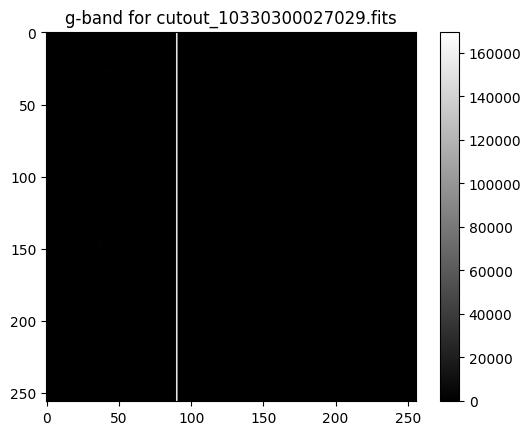

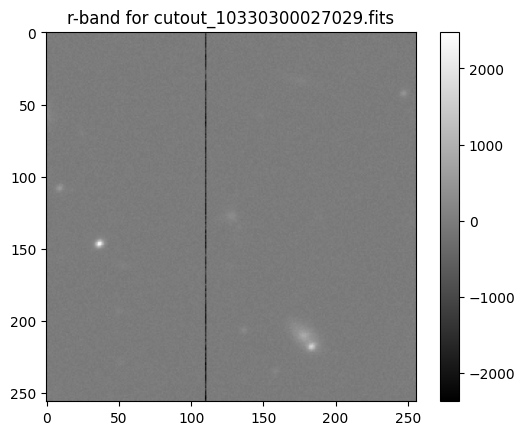

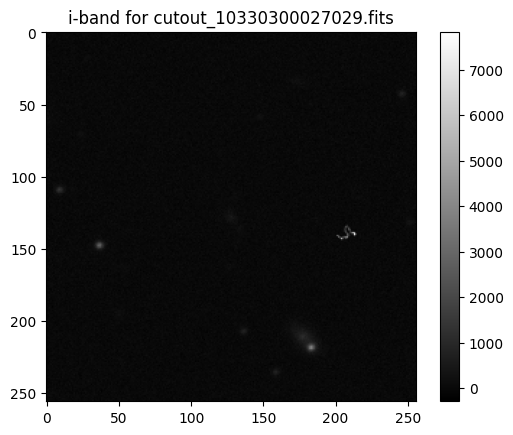

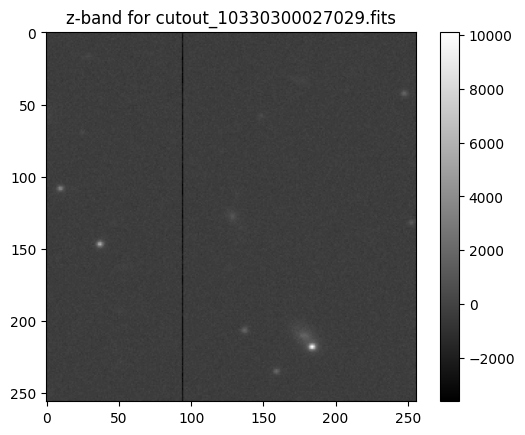

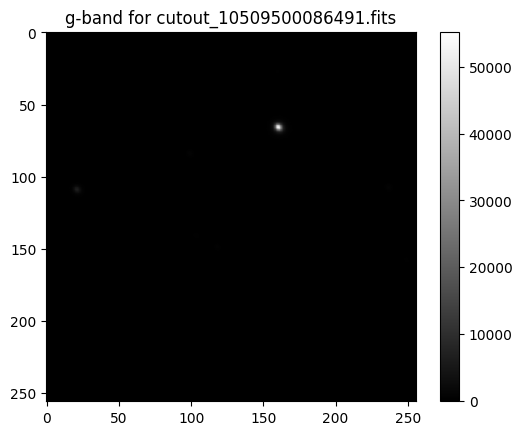

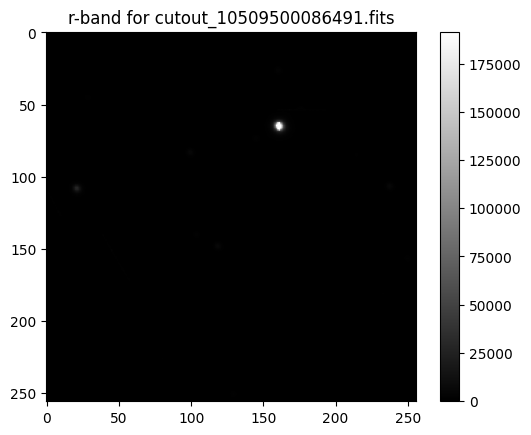

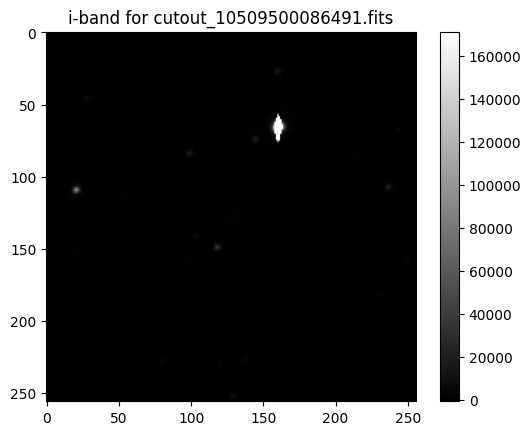

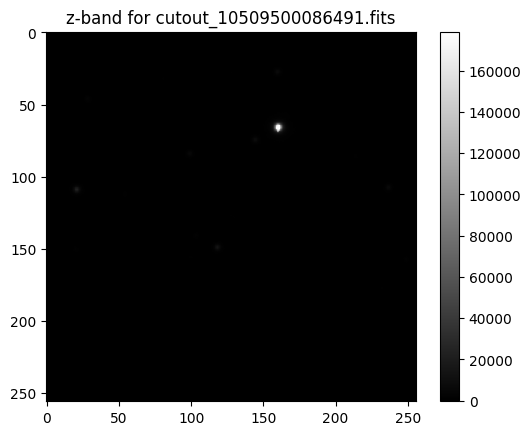

In [6]:
# Loop through each FITS file in the subset
for fits_file in fits_files_subset:
    # Load the FITS file
    with fits.open(os.path.join(fits_directory, fits_file)) as hdul:
        # Loop through the bands (g, r, i, z)
        for band_index, band in enumerate(['g', 'r', 'i', 'z']):
            # Extract the data for the current band
            band_data = hdul[band_index].data
            
            # Create a plot for the current band
            plt.figure()
            plt.imshow(band_data, cmap='gray')
            plt.title(f'{band}-band for {fits_file}')
            plt.colorbar()
            plt.show()

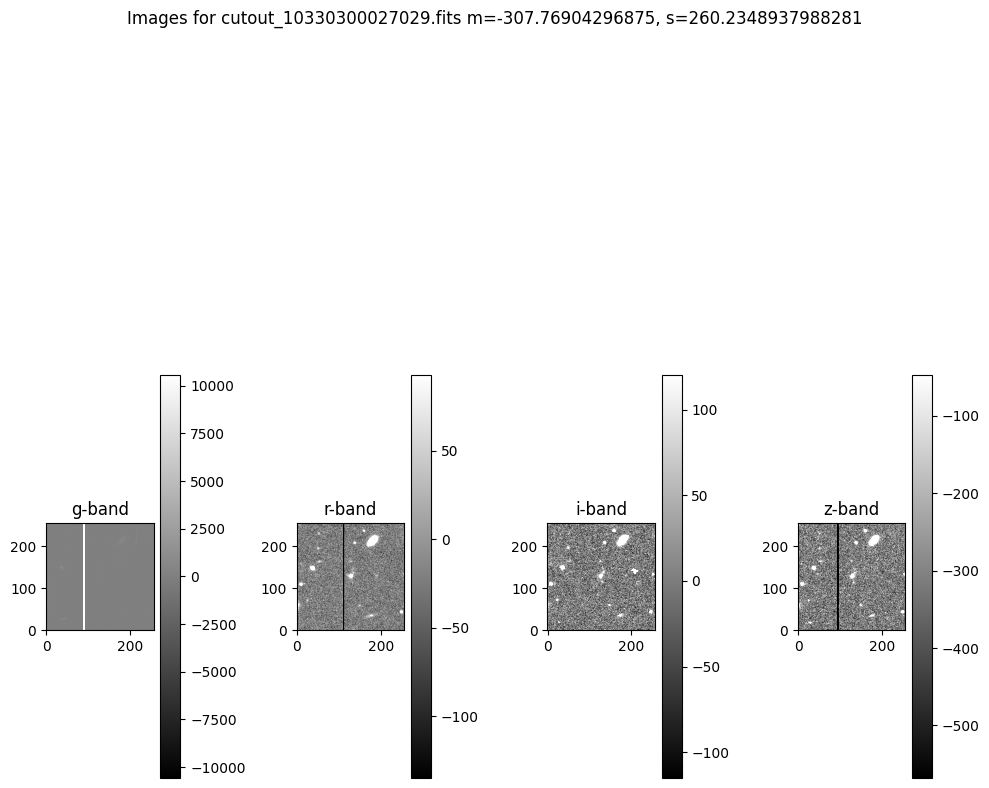

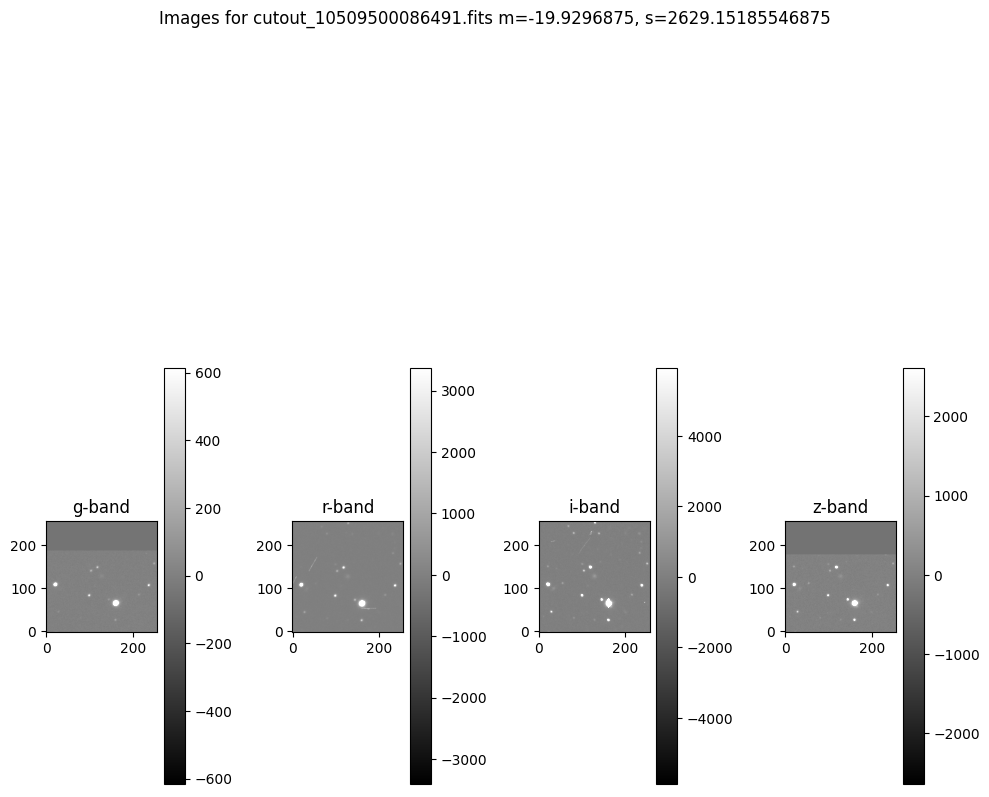

In [9]:
# Define the number of bands
num_bands = 4

# Set the number of columns for subplots (should be equal to the number of bands)
num_columns = num_bands

# Loop through each FITS file in the subset
for fits_file in fits_files_subset:
    # Load the FITS file
    with fits.open(os.path.join(fits_directory, fits_file)) as hdul:
        # Create a new figure for this image
        plt.figure(figsize=(10, 10))  # Adjust the figure size as needed

        # Loop through the bands (g, r, i, z)
        for band_index, band in enumerate(['g', 'r', 'i', 'z']):
            # Extract the data for the current band
            band_data = hdul[band_index].data
            m, s = np.median(band_data), np.std(band_data)
            # Add a subplot for the current band
            plt.subplot(1, num_columns, band_index + 1)
            plt.imshow(band_data, cmap='gray', vmin = m-s, vmax = m+s, origin = 'lower')
            #plt.imshow(band_data, cmap='gray', vmin = -300, vmax = 300, origin = 'lower')
            plt.title(f'{band}-band')
            plt.colorbar()

        # Set the title for the entire plot (e.g., file name)
        plt.suptitle(f'Images for {fits_file} m={m}, s={s}', y=1.05)

        # Adjust spacing between subplots
        plt.tight_layout()

        # Show the plot for this image
        plt.show()

- As you may note now some galaxy images shows strange features in the image and also missing bands. The following code can be userd to create a diagnostic for each image, regarding the availability of a specific band, and the percentage of pixels with counts equals to zero. Use it to check your fits_file_subset

# Here is the code fo a full diagnostic, modify it wity your needs.

In [13]:

filenames = []
ids = []
g_m_values = []
g_s_values = []
r_m_values = []
r_s_values = []
i_m_values = []
i_s_values = []
z_m_values = []
z_s_values = []
g_flags = []
r_flags = []
i_flags = []
z_flags = []
g_zero_percentage_list = []
r_zero_percentage_list = []
i_zero_percentage_list = []
z_zero_percentage_list = []
g_min_percentage_list = []
r_min_percentage_list = []
i_min_percentage_list = []
z_min_percentage_list = []

total_files = len(fits_files_subset)

for idx, fits_file in enumerate(fits_files_subset):
    #print progress
    print(f"Processing file {idx + 1} of {total_files}")

    #flags and values for each band
    g_flag = 0
    r_flag = 0
    i_flag = 0
    z_flag = 0
    g_m = 0
    g_s = 0
    r_m = 0
    r_s = 0
    i_m = 0
    i_s = 0
    z_m = 0
    z_s = 0
    #Initialize zero percentage values for each band
    g_zero_percentage = 0.0
    r_zero_percentage = 0.0
    i_zero_percentage = 0.0
    z_zero_percentage = 0.0
    #Initialize minimum percentage values for each band
    g_min_percentage = 0.0
    r_min_percentage = 0.0
    i_min_percentage = 0.0
    z_min_percentage = 0.0
    
    file_id = int(fits_file.split('_')[1].split('.')[0])
    #Load the FITS file
    with fits.open(os.path.join(fits_directory, fits_file)) as hdul:
        #Loop through the bands (g, r, i, z)
        for band_index, band in enumerate(['g', 'r', 'i', 'z']):
            #Extract the data for the current band
            band_data = hdul[band_index].data
            m, s = np.median(band_data), np.std(band_data)
            min_value, max_value = np.min(band_data),np.max(band_data)
            ####calculate the percentage of zeros for each band
            num_zero_pixels = np.sum(band_data == 0)
            total_pixels = band_data.size
            percentage_zero_pixels = (num_zero_pixels / total_pixels) * 100
            #####calculate the percentage of pixels with minimum values in order to identify the stripes
            num_min_pixels = np.sum(band_data == min_value)
            percentage_min_pixels = (num_min_pixels / total_pixels) * 100
            #Assign m and s values for each band
            if band == 'g':
                g_m = m
                g_s = s
                g_zero_percentage = percentage_zero_pixels
                g_min_percentage = percentage_min_pixels
            elif band == 'r':
                r_m = m
                r_s = s
                r_zero_percentage = percentage_zero_pixels
                r_min_percentage = percentage_min_pixels
            elif band == 'i':
                i_m = m
                i_s = s
                i_zero_percentage = percentage_zero_pixels
                i_min_percentage = percentage_min_pixels
            elif band == 'z':
                z_m = m
                z_s = s
                z_zero_percentage = percentage_zero_pixels
                z_min_percentage = percentage_min_pixels
            # Check if both m and s are zero
            if m != 0 or s != 0:
                if band == 'g':
                    g_flag = 1
                elif band == 'r':
                    r_flag = 1
                elif band == 'i':
                    i_flag = 1
                elif band == 'z':
                    z_flag = 1

    #Append data for this file to the lists
    filenames.append(fits_file)
    ids.append(file_id)
    g_m_values.append(g_m)
    g_s_values.append(g_s)
    r_m_values.append(r_m)
    r_s_values.append(r_s)
    i_m_values.append(i_m)
    i_s_values.append(i_s)
    z_m_values.append(z_m)
    z_s_values.append(z_s)
    g_flags.append(g_flag)
    r_flags.append(r_flag)
    i_flags.append(i_flag)
    z_flags.append(z_flag)
    g_zero_percentage_list.append(g_zero_percentage)
    r_zero_percentage_list.append(r_zero_percentage)
    i_zero_percentage_list.append(i_zero_percentage)
    z_zero_percentage_list.append(z_zero_percentage)
    g_min_percentage_list.append(g_min_percentage)
    r_min_percentage_list.append(r_min_percentage)
    i_min_percentage_list.append(i_min_percentage)
    z_min_percentage_list.append(z_min_percentage)

#Create a DataFrame from the data
data = {
    'Filename': filenames,
    'QUICK_OBJECT_ID': ids,
    'g_m': g_m_values,
    'g_s': g_s_values,
    'r_m': r_m_values,
    'r_s': r_s_values,
    'i_m': i_m_values,
    'i_s': i_s_values,
    'z_m': z_m_values,
    'z_s': z_s_values,
    'gband': g_flags,
    'rband': r_flags,
    'iband': i_flags,
    'zband': z_flags,
    #################
    'g_zero_percentage':g_zero_percentage_list,
    'r_zero_percentage':r_zero_percentage_list,
    'i_zero_percentage':i_zero_percentage_list,
    'z_zero_percentage':z_zero_percentage_list,
    'g_min_percentage':g_min_percentage_list,
    'r_min_percentage':r_min_percentage_list,
    'i_min_percentage':i_min_percentage_list,
    'z_min_percentage':z_min_percentage_list,
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
#csv_filename = "/luidhy_docker/astrodados/DELVE_MORPHOLOGY_DATA/CONTROL_SAMPLE_CNN/DOMINGUEZ_galaxies/preprocessing_DOMINGUEZ_images_withdiagnostics.csv"
csv_filename = "preprocessing_testing_withdiagnostics.csv"

df.to_csv(csv_filename, index=False)

print(f"CSV file saved: {csv_filename}")

Processing file 1 of 2
Processing file 2 of 2
CSV file saved: preprocessing_testing_withdiagnostics.csv
